#### Libraries

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

In [2]:
os.getcwd()

'/home/tiagociic/Projectos/tabular_data_augmentation/notebooks'

#### Confusion Matrices Path

In [26]:
# absolute path to the directory containing the data (/home/tiagociic/Projectos/tabular_data_augmentation/results/conf_matrix)
DATA_DIR = '/home/tiagociic/Projectos/tabular_data_augmentation/results/conf_matrix'
# list CSV absolute paths
files = [os.path.join(DATA_DIR, f) for f in os.listdir(DATA_DIR) if f.endswith('.csv')]
# from files filter 'Decision Tree'
files_dt = [f for f in files if 'Decision Tree' in f]
files_dt

['/home/tiagociic/Projectos/tabular_data_augmentation/results/conf_matrix/Decision Tree_SMOTE-NC.csv',
 '/home/tiagociic/Projectos/tabular_data_augmentation/results/conf_matrix/Decision Tree_SMOTE.csv',
 '/home/tiagociic/Projectos/tabular_data_augmentation/results/conf_matrix/Decision Tree_RealTabFormer.csv',
 '/home/tiagociic/Projectos/tabular_data_augmentation/results/conf_matrix/Decision Tree_GReaT.csv',
 '/home/tiagociic/Projectos/tabular_data_augmentation/results/conf_matrix/Decision Tree_None.csv']

In [47]:
for file in files_dt:
    # load the conf_matrix
    conf_matrix = pd.read_csv(file, index_col=0)
    # To avoid division by zero
    epsilon = 1e-10
    # calculate the number of classes
    num_classes = len(conf_matrix)
    # calculate the macro-precision and macro-recall, accuracy for each class
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    accuracy = np.zeros(num_classes)

    for i in range(num_classes):
        # True Positives: Correct predictions for class i
        TP = conf_matrix.iloc[i, i]
        # False Positives: Incorrect predictions as class i
        FP = conf_matrix.iloc[:, i].sum() - TP
        # False Negatives: Incorrect predictions of other classes for actual class i
        FN = conf_matrix.iloc[i, :].sum() - TP
        # True Negatives: Correct predictions for classes other than i
        TN = conf_matrix.sum().sum() - TP - FP - FN
        # Precision for class i: TP / (TP + FP).
        # Ratio of correctly predicted positive observations to the total predicted positives.
        precision[i] = TP / (TP + FP + epsilon)
        # Recall (Sensitivity) for class i: TP / (TP + FN).
        # Ratio of correctly predicted positive observations to the all observations in the actual class.
        recall[i] = TP / (TP + FN + epsilon)
        # Accuracy for class i: (TP + TN) / (TP + FP + FN + TN).
        # Ratio of correctly predicted observations to the total observations.
        accuracy[i] = (TP + TN) / (TP + FP + FN + TN + epsilon)

    # calculate the macro-f1 score
    f1 = np.zeros(num_classes)
    model_name, augmentation = os.path.basename(file)[:-4].split('_') 
    for i in range(num_classes):
        # F1 Score for class i: 2 * (Precision * Recall) / (Precision + Recall). 
        # It's the harmonic mean of precision and recall.
        f1[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i] + epsilon)

    # print the results in percentage 
    print(f"Model: {model_name}, Augmentation: {augmentation}")
    print('Macro Precision: {:.2%}'.format(precision.mean()))
    print('Macro Recall: {:.2%}'.format(recall.mean()))
    print('Macro F1: {:.2%}'.format(f1.mean()))
    print('Macro Accuracy: {:.2%}'.format(accuracy.mean()))
    print('')

Model: Decision Tree, Augmentation: SMOTE-NC
Macro Precision: 87.36%
Macro Recall: 91.16%
Macro F1: 88.16%
Macro Accuracy: 99.73%

Model: Decision Tree, Augmentation: SMOTE
Macro Precision: 87.37%
Macro Recall: 91.18%
Macro F1: 88.19%
Macro Accuracy: 99.73%

Model: Decision Tree, Augmentation: RealTabFormer
Macro Precision: 87.19%
Macro Recall: 90.97%
Macro F1: 88.45%
Macro Accuracy: 99.71%

Model: Decision Tree, Augmentation: GReaT
Macro Precision: 80.03%
Macro Recall: 87.04%
Macro F1: 78.59%
Macro Accuracy: 99.54%

Model: Decision Tree, Augmentation: None
Macro Precision: 91.11%
Macro Recall: 91.42%
Macro F1: 91.26%
Macro Accuracy: 99.76%



In [ ]:
# DATA_DIR2 = '/home/tiagociic/Projectos/tabular_data_augmentation/results/conf_matrix2'

# # list CSV absolute paths from DATA_DIR2
# files= [os.path.join(DATA_DIR2, f) for f in os.listdir(DATA_DIR2) if f.endswith('.csv')]
# # add the CSV absolute paths from DATA_DIR2to the list files
# files.extend(files_tabnet)
# files

In [28]:
# If duplicate files are found, remove from the list
# files = list(set(files))

In [29]:
# from each conf_matrix2 file, calculate f1 score for each class
f1_scores = pd.DataFrame(columns=['class', 'f1_score'])
for file in files_dt:
    # load the conf_matrix
    conf_matrix = pd.read_csv(file, index_col=0)
    # To avoid division by zero
    epsilon = 1e-10
    # calculate the number of classes
    num_classes = len(conf_matrix)
    # initialize the arrays
    f1 = np.zeros(num_classes)
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    for i in range(num_classes):
        # True Positives: Correct predictions for class i
        TP = conf_matrix.iloc[i,i]
        # False Positives: Incorrect predictions as class i
        FP = conf_matrix.iloc[:,i].sum() - TP
        # False Negatives: Incorrect predictions of other classes for actual class i
        FN = conf_matrix.iloc[i,:].sum() - TP
        # True Negatives: Correct predictions for classes other than i
        TN = conf_matrix.sum().sum() - TP - FP - FN
        # Precision for class i: TP / (TP + FP). 
        # Ratio of correctly predicted positive observations to the total predicted positives.
        precision[i] = TP / (TP + FP + epsilon)
        # Recall (Sensitivity) for class i: TP / (TP + FN). 
        # Ratio of correctly predicted positive observations to the all observations in actual class.
        recall[i] = TP / (TP + FN + epsilon)
        # F1 Score for class i: 2 * (Precision * Recall) / (Precision + Recall). 
        # It's the harmonic mean of precision and recall.
        f1[i] = 2 * TP / (2 * TP + FP + FN + epsilon)
    model_name, augmentation = os.path.basename(file)[:-4].split('_') 
    # print(model_name, augmentation)
    # save the results in a df
    if f1_scores.empty:
        f1_scores = pd.DataFrame({'model_name': model_name, 'augmentation': augmentation, 'class': conf_matrix.index, 'f1_score': f1})
        prec_recall_scores = pd.DataFrame({'model_name': model_name, 'augmentation': augmentation, 'class': conf_matrix.index, 'precision': precision, 'recall': recall})
        
    else:
        new_scores = pd.DataFrame({'model_name': model_name, 'augmentation': augmentation, 'class': conf_matrix.index, 'f1_score': f1})
        f1_scores = pd.concat([f1_scores, new_scores], ignore_index=True)
        new_prec_recall_scores = pd.DataFrame({'model_name': model_name, 'augmentation': augmentation, 'class': conf_matrix.index, 'precision': precision, 'recall': recall})
        prec_recall_scores = pd.concat([prec_recall_scores, new_prec_recall_scores], ignore_index=True)

In [30]:
# filter the results by model_name
df_dt = f1_scores[(f1_scores['model_name'] == 'Decision Tree')]
df_rf = f1_scores[(f1_scores['model_name'] == 'Random Forest')]
df_xgb = f1_scores[(f1_scores['model_name'] == 'XGBoost')]
df_dnn = f1_scores[(f1_scores['model_name'] == 'Neural Net')]
df_tabnet = f1_scores[(f1_scores['model_name'] == 'TabNet')]
print(f"Decision Tree: {df_dt.shape}, Random Forest: {df_rf.shape}, XGBoost: {df_xgb.shape}, TabNet: {df_tabnet.shape}, Neural Net: {df_dnn.shape}")

Decision Tree: (75, 4), Random Forest: (0, 4), XGBoost: (0, 4), TabNet: (0, 4), Neural Net: (0, 4)


In [31]:
df_dt_prec_rec = prec_recall_scores[(prec_recall_scores['model_name'] == 'Decision Tree')]
df_rf_prec_rec = prec_recall_scores[(prec_recall_scores['model_name'] == 'Random Forest')]
df_xgb_prec_rec = prec_recall_scores[(prec_recall_scores['model_name'] == 'XGBoost')]
df_dnn_prec_rec = prec_recall_scores[(prec_recall_scores['model_name'] == 'Neural Net')]
df_tabnet_prec_rec = prec_recall_scores[(prec_recall_scores['model_name'] == 'TabNet')]
print(f"Decision Tree: {df_dt_prec_rec.shape}, Random Forest: {df_rf_prec_rec.shape}, XGBoost: {df_xgb_prec_rec.shape}, TabNet: {df_tabnet_prec_rec.shape}, Neural Net: {df_dnn_prec_rec.shape}")

Decision Tree: (75, 5), Random Forest: (0, 5), XGBoost: (0, 5), TabNet: (0, 5), Neural Net: (0, 5)


In [32]:
# for each model, concatenate the results for each augmentation
df_dt = df_dt.pivot(index='class', columns='augmentation', values='f1_score')
# df_dnn = df_dnn.pivot(index='class', columns='augmentation', values='f1_score')
# df_rf = df_rf.pivot(index='class', columns='augmentation', values='f1_score')
# df_xgb = df_xgb.pivot(index='class', columns='augmentation', values='f1_score')
# df_tabnet = df_tabnet.pivot(index='class', columns='augmentation', values='f1_score')

# for each model, concatenate the results for each augmentation
df_dt_prec_rec = df_dt_prec_rec.pivot(index='class', columns='augmentation', values=['precision', 'recall'])
# df_dnn_prec_rec = df_dnn_prec_rec.pivot(index='class', columns='augmentation', values=['precision', 'recall'])
# df_rf_prec_rec = df_rf_prec_rec.pivot(index='class', columns='augmentation', values=['precision', 'recall'])
# df_xgb_prec_rec = df_xgb_prec_rec.pivot(index='class', columns='augmentation', values=['precision', 'recall'])
# df_tabnet_prec_rec = df_tabnet_prec_rec.pivot(index='class', columns='augmentation', values=['precision', 'recall'])

In [33]:
classes_order = [
    'Normal',
    'DDoS_UDP',
    'DDoS_ICMP',
    'SQL_injection',
    'Vulnerability_scanner',
    'DDoS_TCP',
    'Password',
    'DDoS_HTTP',
    'Uploading',
    'Backdoor',
    'Port_Scanning',
    'XSS',
    'Ransomware',
    'Fingerprinting',
    'MITM']

In [12]:
# retrive the second level column names
# augmentations = df_dt.columns
# reorder the columns like so = [ 'None', 'SMOTE', 'SMOTE-NC', 'RealTabFormer','GReaT']

In [38]:
print("F1 Score")
df_dt

F1 Score


augmentation,GReaT,None,RealTabFormer,SMOTE,SMOTE-NC
class,,,,,
Backdoor,0.941971,0.960792,0.964399,0.956844,0.956531
DDoS_HTTP,0.874124,0.929053,0.821840,0.901673,0.902013
DDoS_ICMP,0.992397,0.999963,0.999926,0.998851,0.998813
DDoS_TCP,0.953147,1.000000,0.999900,1.000000,1.000000
DDoS_UDP,0.961041,1.000000,1.000000,1.000000,1.000000
Fingerprinting,0.058313,0.655738,0.468271,0.336842,0.334828
MITM,0.038855,1.000000,0.938272,1.000000,1.000000
Normal,1.000000,1.000000,1.000000,1.000000,1.000000
Password,0.787795,0.826555,0.830469,0.828886,0.827812


In [ ]:
# # filter the recall values only for df_dt_prec_rec
# df_recall = df_xgb_prec_rec['recall']
# df_precision = df_xgb_prec_rec['precision']
# # order the columns according to the list new_order
# new_order = ['None', 'SMOTE', 'SMOTE-NC', 'RealTabFormer','GReaT']
# df_recall = df_recall[new_order]
# df_precision = df_precision[new_order]
# # concatenate the df_recall and df_precision dataframes, leave class as index
# df_recall_precision = pd.concat([df_recall, df_precision], axis=1)
# # order lines according to the classes_order
# df_recall_precision.loc[classes_order]

In [ ]:
# # Define the new order
# new_order = ['augmentation','None', 'SMOTE', 'SMOTE-NC', 'RealTabFormer', 'GReaT']

# # Get the current order of the second level of the index
# current_order = df_tmp.columns.levels[1]

# # Create a mapping from current order to new order
# order_mapping = {col: new_order.index(col) if col in new_order else len(new_order) + current_order.index(col) for col in current_order}

# # Reorder the columns
# df_tmp = df_tmp.sort_index(axis=1, level=1, key=lambda index: index.map(order_mapping.get))

In [39]:
print("Precision and Recall")
df_dt_prec_rec

Precision and Recall


precision                                              \
augmentation              GReaT      None RealTabFormer     SMOTE  SMOTE-NC   
class                                                                         
Backdoor               0.982512  0.958195      0.977448  0.968108  0.967687   
DDoS_HTTP              0.879920  0.927802      0.793027  0.931848  0.930924   
DDoS_ICMP              0.998725  1.000000      1.000000  1.000000  1.000000   
DDoS_TCP               0.998687  1.000000      0.999800  1.000000  1.000000   
DDoS_UDP               1.000000  1.000000      1.000000  1.000000  1.000000   
Fingerprinting         0.030713  0.628931      0.344051  0.215800  0.214149   
MITM                   0.019812  1.000000      0.883721  1.000000  1.000000   
Normal                 1.000000  1.000000      1.000000  1.000000  1.000000   
Password               0.851333  0.829728      0.854363  0.831112  0.829952   
Port_Scanning          0.940000  0.967262      0.959793  0.966960  0.967467   
Ransomware             0.948341  0.927007      0.937037  0.889166  0.889610   
SQL_injection          0.854455  0.828215      0.830505  0.835840  0.835257   
Uploading              0.835854  0.800752      0.858966  0.798171  0.798086   
Vulnerability_scanner  0.956587  0.962696      0.956557  0.959940  0.960470   
XSS                    0.707479  0.836196      0.683582  0.709241  0.710257   

                         recall                                              
augmentation              GReaT      None RealTabFormer     SMOTE  SMOTE-NC  
class                                                                        
Backdoor               0.904642  0.963404      0.951694  0.945839  0.945629  
DDoS_HTTP              0.868405  0.930307      0.852825  0.873390  0.874844  
DDoS_ICMP              0.986149  0.999926      0.999852  0.997704  0.997630  
DDoS_TCP               0.911580  1.000000      1.000000  1.000000  1.000000  
DDoS_UDP               0.925003  1.000000      1.000000  1.000000  1.000000  
Fingerprinting         0.575342  0.684932      0.732877  0.767123  0.767123  
MITM                   1.000000  1.000000      1.000000  1.000000  1.000000  
Normal                 1.000000  1.000000      1.000000  1.000000  1.000000  
Password               0.733083  0.823407      0.807875  0.826672  0.825683  
Port_Scanning          0.937223  0.960118      0.957903  0.893402  0.893156  
Ransomware             0.905504  0.923157      0.919522  0.924714  0.924714  
SQL_injection          0.753153  0.838248      0.806673  0.833184  0.833681  
Uploading              0.721848  0.790183      0.749484  0.804207  0.802695  
Vulnerability_scanner  0.957646  0.965795      0.961368  0.964286  0.963078  
XSS                    0.875783  0.834267      0.905437  0.847117  0.846458

In [58]:
# Define the new order
new_order = ['augmentation','None', 'SMOTE', 'SMOTE-NC', 'RealTabFormer', 'GReaT']
metric_order = ['precision', 'recall']

# Get the current order of the second level of the index
current_order = df_dt_prec_rec.columns.levels[1]

# Create a mapping from current order to new order
order_mapping = {col: new_order.index(col) if col in new_order else len(new_order) + current_order.index(col) for col in current_order}

# Reorder the columns
df_tmp = df_dt_prec_rec.sort_index(axis=1, level=1, key=lambda index: index.map(order_mapping.get))
# multiply by 100 to get the percentage and round to 2 decimal places
df_tmp["precision"] = df_tmp["precision"] * 100
# round to 2 decimal places
df_tmp["precision"] = df_tmp["precision"].round(2)
df_tmp["precision"]

augmentation,None,SMOTE,SMOTE-NC,RealTabFormer,GReaT
class,,,,,
Backdoor,95.82,96.81,96.77,97.74,98.25
DDoS_HTTP,92.78,93.18,93.09,79.30,87.99
DDoS_ICMP,100.00,100.00,100.00,100.00,99.87
DDoS_TCP,100.00,100.00,100.00,99.98,99.87
DDoS_UDP,100.00,100.00,100.00,100.00,100.00
Fingerprinting,62.89,21.58,21.41,34.41,3.07
MITM,100.00,100.00,100.00,88.37,1.98
Normal,100.00,100.00,100.00,100.00,100.00
Password,82.97,83.11,83.00,85.44,85.13


In [59]:
df_tmp["recall"] = df_tmp["recall"] * 100
df_tmp["recall"] = df_tmp["recall"].round(2)
df_tmp["recall"]

augmentation,None,SMOTE,SMOTE-NC,RealTabFormer,GReaT
class,,,,,
Backdoor,96.34,94.58,94.56,95.17,90.46
DDoS_HTTP,93.03,87.34,87.48,85.28,86.84
DDoS_ICMP,99.99,99.77,99.76,99.99,98.61
DDoS_TCP,100.00,100.00,100.00,100.00,91.16
DDoS_UDP,100.00,100.00,100.00,100.00,92.50
Fingerprinting,68.49,76.71,76.71,73.29,57.53
MITM,100.00,100.00,100.00,100.00,100.00
Normal,100.00,100.00,100.00,100.00,100.00
Password,82.34,82.67,82.57,80.79,73.31


In [46]:
# calculate the mean of precision and recall for each augmentation
df_dt_prec_rec['precision'].mean(axis=0), df_dt_prec_rec['recall'].mean(axis=0)

(augmentation
 GReaT            0.800295
 None             0.911119
 RealTabFormer    0.871923
 SMOTE            0.873746
 SMOTE-NC         0.873591
 dtype: float64,
 augmentation
 GReaT            0.870357
 None             0.914250
 RealTabFormer    0.909701
 SMOTE            0.911843
 SMOTE-NC         0.911646
 dtype: float64)

In [ ]:
# Model: Decision Tree, Augmentation: SMOTE-NC
# Macro Precision: 87.36%
# Macro Recall: 91.16%

# Model: Decision Tree, Augmentation: SMOTE
# Macro Precision: 87.37%
# Macro Recall: 91.18%

# Model: Decision Tree, Augmentation: RealTabFormer
# Macro Precision: 87.19%
# Macro Recall: 90.97%

# Model: Decision Tree, Augmentation: GReaT
# Macro Precision: 80.03%
# Macro Recall: 87.04%

# Model: Decision Tree, Augmentation: None
# Macro Precision: 91.11%
# Macro Recall: 91.42%

## Tabelas delta (diferença entre None e restantes aumentos de dados)

In [ ]:
baseline = df_dt['None']
df_dt.subtract(baseline, axis=0)
df_dt[['SMOTE', 'SMOTE-NC', 'RealTabFormer', 'GReaT']].subtract(baseline, axis=0).map(lambda x: '{:.2%}'.format(x))

augmentation,SMOTE,SMOTE-NC,RealTabFormer,GReaT
class,,,,
Backdoor,-0.38%,-0.94%,-0.24%,-2.40%
DDoS_HTTP,-32.12%,7.21%,-40.60%,4.42%
DDoS_ICMP,0.51%,0.92%,0.74%,0.28%
DDoS_TCP,-8.89%,9.82%,-8.78%,5.14%
DDoS_UDP,82.80%,83.00%,82.95%,79.11%
Fingerprinting,53.04%,33.48%,64.86%,5.83%
MITM,6.29%,6.29%,6.29%,-89.82%
Normal,-0.02%,0.00%,0.00%,0.00%
Password,23.81%,60.17%,31.88%,56.16%


In [ ]:
baseline = df_dnn['None']
df_dnn.subtract(baseline, axis=0)
df_dnn[['SMOTE', 'SMOTE-NC', 'RealTabFormer', 'GReaT']].subtract(baseline, axis=0).map(lambda x: '{:.2%}'.format(x))

augmentation,SMOTE,SMOTE-NC,RealTabFormer,GReaT
class,,,,
Backdoor,-1.43%,-0.79%,-0.11%,-0.71%
DDoS_HTTP,6.91%,-9.78%,-22.35%,-14.58%
DDoS_ICMP,0.12%,-0.04%,0.05%,-0.09%
DDoS_TCP,9.82%,-16.68%,-13.08%,-16.80%
DDoS_UDP,0.02%,0.02%,0.02%,-0.08%
Fingerprinting,-21.38%,-15.45%,12.06%,-3.89%
MITM,0.00%,0.00%,0.00%,-67.73%
Normal,0.00%,-0.00%,-0.00%,0.00%
Password,53.45%,25.61%,20.41%,29.41%


In [ ]:
baseline = df_rf['None']
df_rf.subtract(baseline, axis=0)
df_rf[['SMOTE', 'SMOTE-NC', 'RealTabFormer', 'GReaT']].subtract(baseline, axis=0).map(lambda x: '{:.2%}'.format(x))

augmentation,SMOTE,SMOTE-NC,RealTabFormer,GReaT
class,,,,
Backdoor,-92.29%,4.20%,4.43%,4.18%
DDoS_HTTP,-60.84%,29.46%,22.59%,27.75%
DDoS_ICMP,-0.10%,-0.11%,0.01%,-0.06%
DDoS_TCP,-42.29%,0.00%,0.00%,-0.59%
DDoS_UDP,-0.03%,0.00%,0.00%,-3.94%
Fingerprinting,1.38%,-27.39%,-3.82%,-51.84%
MITM,0.00%,0.66%,0.01%,-93.78%
Normal,-11.74%,5.50%,5.50%,5.50%
Password,-52.92%,25.08%,25.06%,24.26%


In [ ]:
baseline = df_xgb['None']
df_xgb.subtract(baseline, axis=0)
df_xgb[['SMOTE', 'SMOTE-NC', 'RealTabFormer', 'GReaT']].subtract(baseline, axis=0).map(lambda x: '{:.2%}'.format(x))

augmentation,SMOTE,SMOTE-NC,RealTabFormer,GReaT
class,,,,
Backdoor,-0.35%,-0.33%,-0.04%,-0.42%
DDoS_HTTP,0.19%,0.21%,-13.69%,-2.39%
DDoS_ICMP,0.15%,-0.09%,0.05%,0.12%
DDoS_TCP,0.00%,0.00%,0.00%,0.00%
DDoS_UDP,0.01%,0.01%,0.01%,-0.01%
Fingerprinting,-14.31%,-19.11%,2.43%,-32.52%
MITM,0.00%,0.00%,0.66%,-84.93%
Normal,0.00%,0.00%,0.00%,0.00%
Password,0.24%,0.20%,0.04%,0.16%


In [ ]:
baseline = df_tabnet['None']
df_tabnet.subtract(baseline, axis=0)
df_tabnet[['SMOTE', 'SMOTE-NC', 'RealTabFormer', 'GReaT']].subtract(baseline, axis=0).map(lambda x: '{:.2%}'.format(x))

augmentation,SMOTE,SMOTE-NC,RealTabFormer,GReaT
class,,,,
Backdoor,-0.48%,-31.73%,-0.16%,-9.04%
DDoS_HTTP,-21.65%,-72.19%,-61.27%,-31.19%
DDoS_ICMP,44.87%,44.66%,45.18%,44.99%
DDoS_TCP,-26.12%,-26.12%,-20.23%,-16.68%
DDoS_UDP,84.23%,84.35%,83.23%,81.93%
Fingerprinting,58.68%,45.52%,17.79%,54.55%
MITM,0.00%,0.65%,0.65%,-95.92%
Normal,-0.00%,-0.00%,-0.00%,-0.04%
Password,29.97%,-4.57%,20.45%,4.63%


### Calculo da Precisao e Revocação

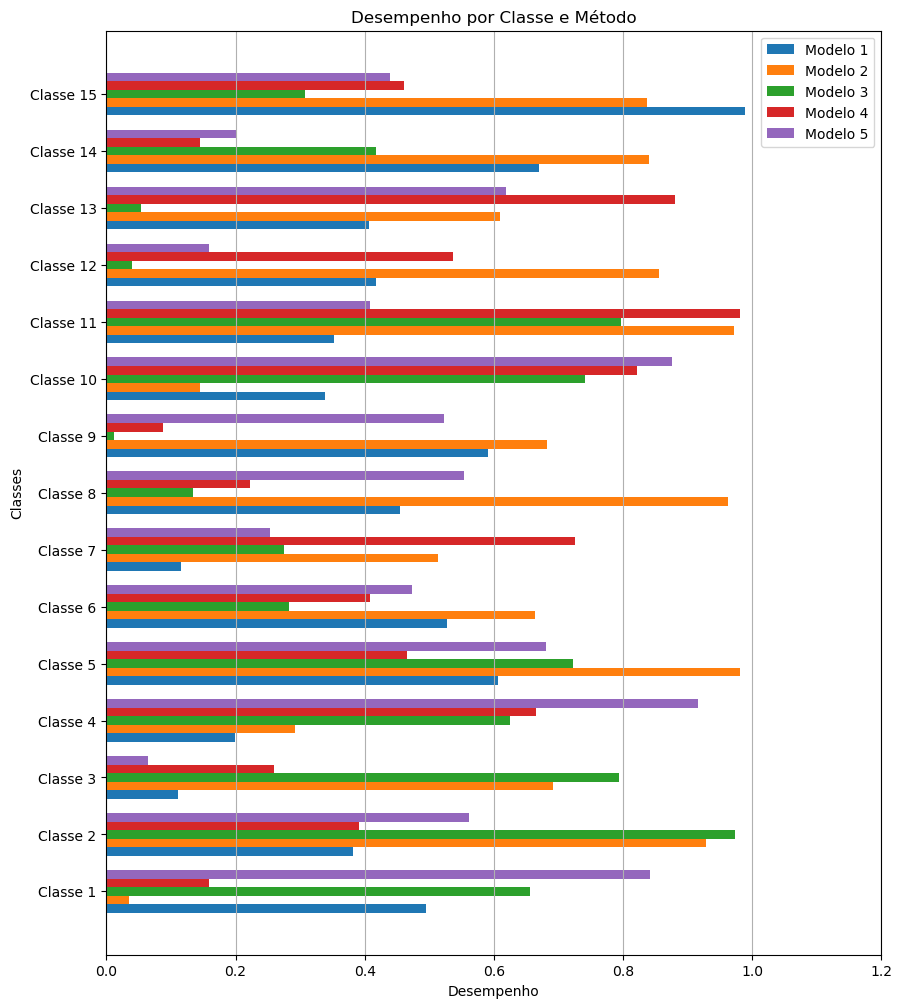

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo (substitua pelos seus próprios dados)
modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5']
metodos = ['Metodo 1', 'Metodo 2', 'Metodo 3', 'Metodo 4', 'Metodo 5']
classes = ['Classe {}'.format(i + 1) for i in range(15)]

# Gere dados fictícios para representar o desempenho (substitua pelos seus próprios dados)
dados_desempenho = np.random.rand(15, 5)

# Configuração do gráfico de barras agrupadas
largura_barra = 0.15
posicoes = np.arange(len(classes))

# tamanho da figura
plt.figure(figsize=(10, 12))

# Criação do gráfico de barras agrupadas
for i, modelo in enumerate(modelos):
    plt.barh(posicoes + i * largura_barra, dados_desempenho[:, i], height=largura_barra, label=modelo)

# Configurações adicionais do gráfico
plt.ylabel('Classes')
plt.xlabel('Desempenho')
plt.title('Desempenho por Classe e Método')
plt.yticks(posicoes + (len(modelos) - 1) * largura_barra / 2, classes)
# Eixo X até 1.2
plt.xlim([0, 1.2])
# Grelha tracejada cinzenta
plt.grid(axis='x')

plt.legend()

# Exibição do gráfico
plt.show()